In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
# saving .csv files to pandas dataframes
def load_data():
    x_df = pd.read_csv('C:/Users/SANKET/Desktop/fer2013/fer2013.csv',names= np.arange(0,3))
#     x_df is an array with labels in 0th index, pixel values in 1st index and label formtrining or test in 2nd index.
    X = x_df[0]
    X = X[1:]
    y = x_df[1]
    y_train = y[1:10001]
    y_test = y[28710:29710]
    Y_train = [np.array(j.split()).astype(int) for j in y_train]
    Y_train = np.array(Y_train)
    Y_test = [np.array(j.split()).astype(int) for j in y_test]
    Y_test = np.array(Y_test)
    count_train = 0
    count_test = 0
    for i in x_df[2]:
        if i == "Training":
            count_train+=1
        elif i == "PublicTest":
            count_test+=1 
    label_train = np.array(X[:10000])
    label_train = label_train.astype(int)
    label_test = np.array(X[count_train:count_train+1000])
    label_test = label_test.astype(int)
    training_data = (Y_train,label_train)
    test_data = (Y_test,label_test)
    return (training_data, test_data)
def load_data_wrapper():
    tr_d , te_d = load_data()
    training_inputs = [np.reshape(x, (2304, 1)) for x in tr_d[0]]
#     print(training_inputs[0])
    for i in range(10000):
        for j in range(2304):
            training_inputs[i][j]= float(training_inputs[i][j]/255)
#     for i in range(0,999):
#         for j in range(2304):
#             te_d[i][j]= float(te_d[i][j]/255)
    print(te_d[0].shape)
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    test_inputs = [np.reshape(x, (2304, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, test_data)

def vectorized_result(j):
    e = np.zeros((7, 1))
    e[j] = 1.0
    return e
# load_data_wrapper()

In [3]:
class network(object):
    def __init__(self,sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        self.weights = [np.random.randn(y,x) for x,y in zip(sizes[:-1],sizes[1:])]

    def feedforward(self,a):
        for w,b in zip(self.weights,self.biases):
            a = sigmoid(np.dot(w,a)+b)
        return a

    def gradient_descent(self,training_data,epochs,mini_batch_size,alpha,test_data = None):
        if test_data:
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batchs = [training_data[k:k+mini_batch_size] for k in range(0,n,mini_batch_size)]
            for mini_batch in mini_batchs:
                self.update(mini_batch,alpha)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(j,self.evaluate(test_data),n_test))
            else:
                print("Epoch {0} complete".format(j))
    def update(self,batch,alpha):
        new_b = [np.zeros(b.shape) for b in self.biases]
        new_w = [np.zeros(w.shape) for w in self.weights]
        for x,y in batch:
            delta_w,delta_b = self.backpropagation(x,y)
            new_b = [nb+dnb for nb,dnb in zip(new_b,delta_b)]
            new_w = [nw+dnw for nw,dnw in zip(new_w,delta_w)]
        self.weights = [w-(alpha*nw)/len(batch) for w,nw in zip(self.weights,new_w)]
        self.biases = [b-(alpha*nb)/len(batch) for b,nb in zip(self.biases,new_b)]

    def backpropagation(self,x,y):
        new_b = [np.zeros(b.shape) for b in self.biases]
        new_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x]
        zs = []
        for b,w in zip(self.biases,self.weights):
            z = np.dot(w,activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        new_b[-1] = delta
        new_w[-1] = np.dot(delta,activations[-2].transpose())
        for l in range(2,self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(),delta)*sp
            new_b[-l] = delta
            new_w[-l] = np.dot(delta,activations[-l-1].transpose())
        return (new_w,new_b)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x != y) for (x, y) in test_results)
    def cost_derivative(self,output_activation,y):
        return (output_activation-y)

In [4]:
def sigmoid(z):
    val = 1.0/(1.0+np.exp(-z))
#     print(val)
    return val
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [5]:
training_data, test_data = load_data_wrapper()

(1000, 2304)


In [6]:
net = network([2304, 30, 7])
net.gradient_descent(training_data, 30, 10, 1)

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete


In [25]:
net = network([2304, 30, 7])
net.gradient_descent(training_data, 30, 10, 1, test_data=test_data)

C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 0: 232 / 1000
Epoch 1: 233 / 1000
Epoch 2: 227 / 1000
Epoch 3: 165 / 1000
Epoch 4: 163 / 1000
Epoch 5: 229 / 1000
Epoch 6: 227 / 1000


KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
train,test = load_data()

I thinks it's angry


C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


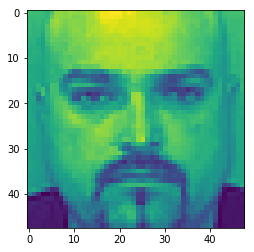

In [9]:
x = np.random.randint(0, 1000)
images = train[0]
labels = train[1]
X = images[x].reshape(48,48)
Y = labels[x]
plt.imshow(X)
val = [(train[0][x],train[1][x])]
e = net.evaluate(val)
if e == 0:
    print("I thinks it's angry")
elif e == 1:
    print("I thinks its Disgust")
elif e == 2:
    print("I thinks its happy")
elif e == 3:
    print("I thinks its sad")
elif e == 4:
    print("I thinks its neutral")
elif e == 5:
    print("I thinks its fear")
elif e == 6:
    print("I thinks its ok")

I thinks it's angry


C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


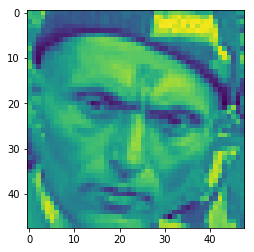

In [69]:
x = np.random.randint(0, 1000)
images = train[0]
labels = train[1]
X = images[x].reshape(48,48)
Y = labels[x]
plt.imshow(X)
val = [(train[0][x],train[1][x])]
e = net.evaluate(val)
if e == 0:
    print("I thinks it's angry")
elif e == 1:
    print("I thinks its Disgust")
elif e == 2:
    print("I thinks its happy")
elif e == 3:
    print("I thinks its sad")
elif e == 4:
    print("I thinks its neutral")
elif e == 5:
    print("I thinks its fear")
elif e == 6:
    print("I thinks its ok")